<a href="https://colab.research.google.com/github/AlexBB999/Bridges/blob/master/X_BRIDGES_999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
% matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, log_loss, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import pickle
import seaborn as sns

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_colwidth', 700)
pd.set_option('display.max_rows',123)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})

In [ ]:
import os
os.getcwd()

'/content'

#**The current system for inspecting bridges is expensive, time-consuming and inefficient**

The FHWA requires evaluation of all **617,084** bridges however; it is costly having a bi­annual inspection cost of $2.7 billion for the U.S

where  the  average inspection costper bridge ranges from \$4,500 to \$10,000.  This requires closing lanes for the span of theinspection, which can take 1 to 3 days causing traffic congestions. These are **2014** figures.

**https://catsr.vse.gmu.edu/SYST490/490_2014_BI/BIS_FinalReport.pdf**

### **THE TARGET IS LOWEST RATING

**THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"**

Your LOWEST_SCORE on any of the following  4 features/conditions determines your lowest overall sccore. A score of 4 or less on ny of these four means the bridge is **SD (Structurally Deficient**). SD means the bridge needs repairs/replacement. These terms are defined in accordance with the Pavement and Bridge Condition Performance Measures final rule, published in January of 2017:

Item 58 (Deck)

Item 59 (Superstructure)

Item 60 (Substructure)

Item 62 (Culvert). 




NOTE: Some bridges do not have all four of these features

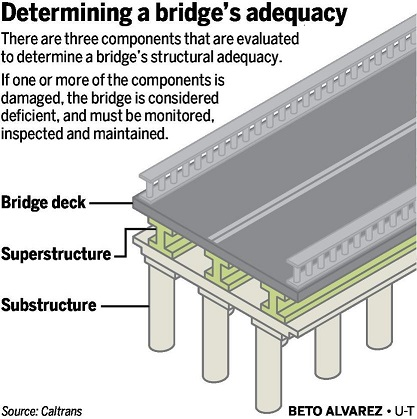

In [4]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/Bridges/master/bridge_diagram-2x.jpg')

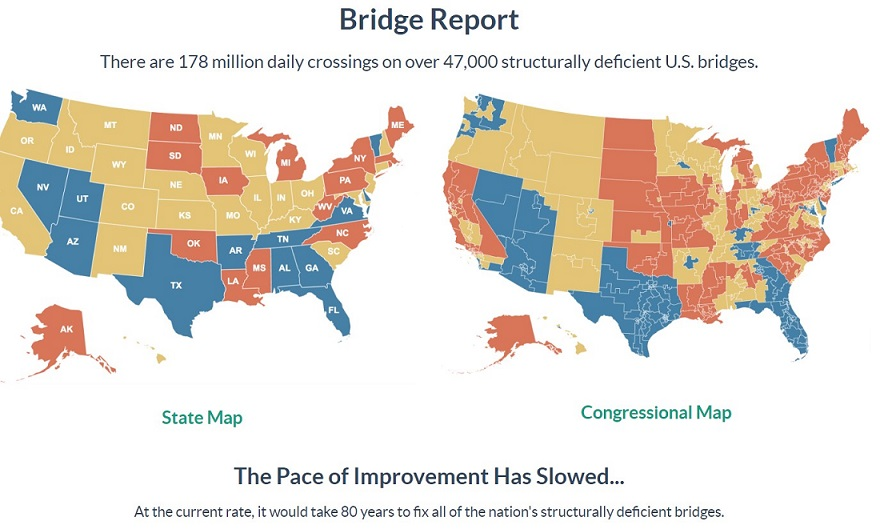

In [1]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/Bridges/master/reduced.jpg')

# **TWO OBJECTIVES**

1 -- **Granualrity/priortization -- Create a modified rating system that will allow decimal score like 4.4 or 6.5 instead of only the integers from zero to nine. A way to help prioritize bridges repairs/inspections.**



2 -- **Disaggregation -- Breakdown the rating for each bridge into single feature contributions.** 

#**STAKEHOLDERS**

The stakeholders have been clearly defined in the above quoted article:

The primary stakeholders of the bridge inspection systems are the Federal
Highway Administration (FHWA), District Department of Transportation (DDOT),
Bridge Design Engineers, Bridge Construction Team, and the Inspection Team which are directly involved with the construction and inspection of the bridge. The secondary stakeholders are groups of people that are not directly involved with the construction and inspection but are impacted indirectly like the general public that cross bridges daily.




In [ ]:
bridges202 = pd.read_csv('/content/drive/My Drive/2019HwyBridgesDelimitedAllStates.txt', sep=',',encoding='ISO-8859-1',low_memory=False)

In [ ]:
bridges2020=bridges202.copy()

In [ ]:
bridges2020.shape

(617084, 123)

In [ ]:
bridges2020.head(2)

STATE_CODE_001 STRUCTURE_NUMBER_008  ...  LOWEST_RATING  DECK_AREA
0               1      00000000000S702  ...              7     145.50
1               1      00000000000S703  ...              7     133.28

[2 rows x 123 columns]

In [ ]:



plt.rc('font', size=8)  

#bridges2020.describe().plot()
#bridges2020.describe().plot(figsize=(20,20));
bridges2020.describe()
#bridges2020.plot(figsize=(10,10))
#df.plot(figsize=(3,3))

STATE_CODE_001  RECORD_TYPE_005A  ...  LOWEST_RATING  DECK_AREA
count       617084.00         617084.00  ...      617084.00  617084.00
mean            29.97              1.00  ...           6.23     637.30
std             15.34              0.00  ...           1.21    2549.02
min              1.00              1.00  ...           0.00       1.92
25%             18.00              1.00  ...           5.00      93.10
50%             29.00              1.00  ...           6.00     207.40
75%             42.00              1.00  ...           7.00     579.67
max             78.00              1.00  ...           9.00  372399.36

[8 rows x 81 columns]

### **ALL FEATURES-- IDENTIFYING FEATURES BY COLUMN NUMBER**

In [ ]:
bridges2020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617084 entries, 0 to 617083
Data columns (total 123 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STATE_CODE_001           int64  
 1   STRUCTURE_NUMBER_008     object 
 2   RECORD_TYPE_005A         int64  
 3   ROUTE_PREFIX_005B        float64
 4   SERVICE_LEVEL_005C       float64
 5   ROUTE_NUMBER_005D        object 
 6   DIRECTION_005E           float64
 7   HIGHWAY_DISTRICT_002     object 
 8   COUNTY_CODE_003          float64
 9   PLACE_CODE_004           int64  
 10  FEATURES_DESC_006A       object 
 11  CRITICAL_FACILITY_006B   float64
 12  FACILITY_CARRIED_007     object 
 13  LOCATION_009             object 
 14  MIN_VERT_CLR_010         float64
 15  KILOPOINT_011            float64
 16  BASE_HWY_NETWORK_012     float64
 17  LRS_INV_ROUTE_013A       object 
 18  SUBROUTE_NO_013B         float64
 19  LAT_016                  float64
 20  LONG_017                 float64
 21  DETOUR_KI

**DISTRIBUTION OF LOWEST_RATING -- ENTIRE DATASET**





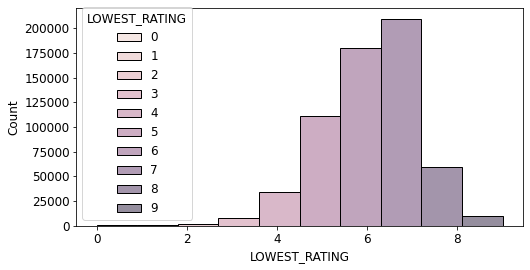

In [ ]:
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
sns.histplot(data=bridges2020,x='LOWEST_RATING',hue='LOWEST_RATING',bins=10);

In [ ]:
bridges2020['LOWEST_RATING'].mean()

6.225147629820252

In [ ]:
bridges2020['LOWEST_RATING'].median()

6.0

#**EXPLANATION FOR COLUMNS DROPPED BEFORE ANY ANALYSIS**

I am not creating a dashboard so any columns having to do with location/identification are **not** relevent at this time. Thus, I have dropped the following columns:

State_code

Record_type

Route_prefix

Route_number

Direction

Highway District

County_code

Place_code

Features_Desc

Location

Kilopoint

Base_Hwy_network

LRS_Inv_Route

Subroute

Latitude

Longitude

Detour Kilos

Without goiing into the same level of detail , I have also dropped all columns having to do with water/navigation and other irrelevant columns like Right_curb and Left_curb. I am not stating that this information is not useful -- I am simply simplifying this project. To factor in all 123 features and many subfeatures is not a project -- it's a full-time job.

In [ ]:
bridges99=bridges2020.iloc[:,[22,23,26,27,29,31,45,47,48,54,59,66,67,68,69,71,72,74,75,106,107,108,109,120,121, 122]].copy()

In [ ]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617084 entries, 0 to 617083
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TOLL_020                 617084 non-null  int64  
 1   MAINTENANCE_021          617074 non-null  float64
 2   YEAR_BUILT_027           617045 non-null  float64
 3   TRAFFIC_LANES_ON_028A    617082 non-null  float64
 4   ADT_029                  617035 non-null  float64
 5   DESIGN_LOAD_031          617058 non-null  object 
 6   SERVICE_ON_042A          617084 non-null  int64  
 7   STRUCTURE_KIND_043A      617084 non-null  int64  
 8   STRUCTURE_TYPE_043B      617084 non-null  int64  
 9   MAX_SPAN_LEN_MT_048      617084 non-null  float64
 10  DECK_WIDTH_MT_052        617084 non-null  float64
 11  DECK_COND_058            617084 non-null  object 
 12  SUPERSTRUCTURE_COND_059  617084 non-null  object 
 13  SUBSTRUCTURE_COND_060    617084 non-null  object 
 14  CHAN

**98.6% OF ROADS ARE FREE ROADS SO DROPPING TOLL_020**

**DROPPING BRIDGE_CONDITION SINCE IT IS VERY HIGHLY CORRLEATED WITH LOWEST_SCORE**

**ONLY LOOKING AT BRIDGES BUILT AFTER 1918  -- BRIDGES < 100 YEARS OLD**

In [ ]:
bridges99.drop('TOLL_020',axis=1,inplace=True)
bridges99.drop('BRIDGE_CONDITION',axis=1,inplace=True)
bridges99=bridges99[bridges99['YEAR_BUILT_027']>1918]

In [ ]:
bridges99.shape

(604639, 24)

**CHECK FOR NAN**

In [ ]:
bridges99.isna().sum()

MAINTENANCE_021              10
YEAR_BUILT_027                0
TRAFFIC_LANES_ON_028A         1
ADT_029                       7
DESIGN_LOAD_031               1
SERVICE_ON_042A               0
STRUCTURE_KIND_043A           0
STRUCTURE_TYPE_043B           0
MAX_SPAN_LEN_MT_048           0
DECK_WIDTH_MT_052             0
DECK_COND_058                 0
SUPERSTRUCTURE_COND_059       0
SUBSTRUCTURE_COND_060         0
CHANNEL_COND_061              0
OPR_RATING_METH_063           1
OPERATING_RATING_064       2694
INVENTORY_RATING_066       2697
STRUCTURAL_EVAL_067           0
DECK_STRUCTURE_TYPE_107       0
SURFACE_TYPE_108A             0
MEMBRANE_TYPE_108B            0
DECK_PROTECTION_108C          1
LOWEST_RATING                 0
DECK_AREA                     0
dtype: int64

**DROP NANs -- LESS THAN .8% OF DATA**

In [ ]:
bridges99.dropna(how='any',inplace=True,axis=0)
bridges99.isna().sum()

MAINTENANCE_021            0
YEAR_BUILT_027             0
TRAFFIC_LANES_ON_028A      0
ADT_029                    0
DESIGN_LOAD_031            0
SERVICE_ON_042A            0
STRUCTURE_KIND_043A        0
STRUCTURE_TYPE_043B        0
MAX_SPAN_LEN_MT_048        0
DECK_WIDTH_MT_052          0
DECK_COND_058              0
SUPERSTRUCTURE_COND_059    0
SUBSTRUCTURE_COND_060      0
CHANNEL_COND_061           0
OPR_RATING_METH_063        0
OPERATING_RATING_064       0
INVENTORY_RATING_066       0
STRUCTURAL_EVAL_067        0
DECK_STRUCTURE_TYPE_107    0
SURFACE_TYPE_108A          0
MEMBRANE_TYPE_108B         0
DECK_PROTECTION_108C       0
LOWEST_RATING              0
DECK_AREA                  0
dtype: int64

**LOWEST_SCORE IS THE TARGET SO CONVERT TO BINARY  NUMERIC**

**I have chosen to incude a rating of 5 in the fail group for two reasons**:

**Help balance the classes**

**5 is borderline to begin with**

**Class 1 if lowest score is 0,1,2,3,4,5**

**Class 0 if lowest score is 6,7,8,9**

In [ ]:
bridges99['LOWEST_RATING'] = np.where(bridges99['LOWEST_RATING']<6, 1,0)
bridges99['LOWEST_RATING'].value_counts(dropna=False)


0    452878
1    149040
Name: LOWEST_RATING, dtype: int64

In [ ]:
k=[col for col in list(bridges99) if bridges99[col].dtype==object];k

['DESIGN_LOAD_031',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'CHANNEL_COND_061',
 'OPR_RATING_METH_063',
 'STRUCTURAL_EVAL_067',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C']

**CONVERT OBJECT TO NUMERIC WITH LABELENCODER**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in k:
  bridges99[col]  = labelencoder.fit_transform(bridges99[col])

**HISTOGRAMS OF FEATURES**



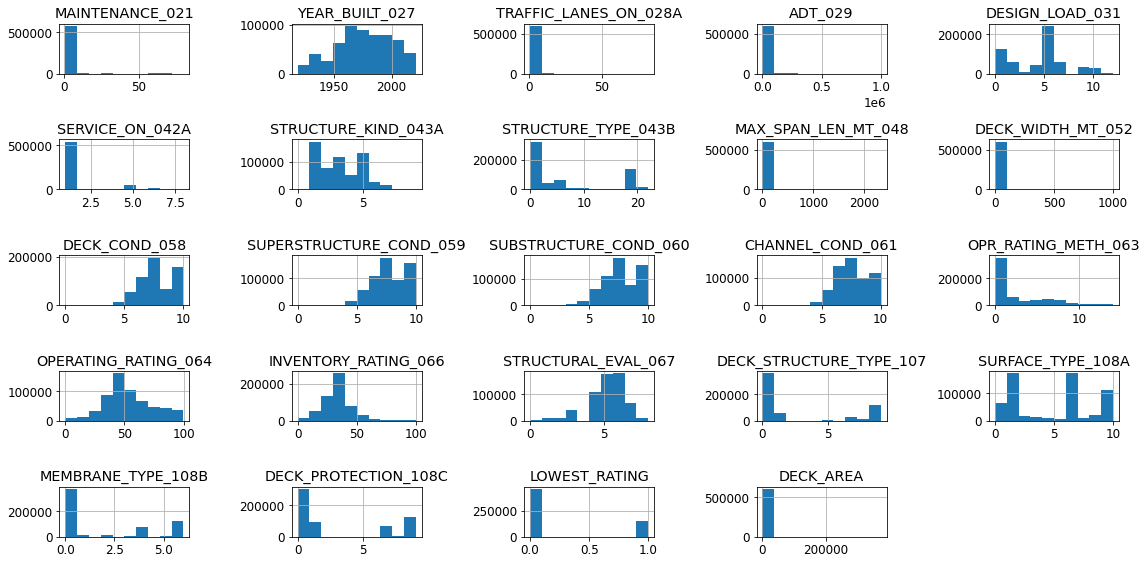

In [ ]:
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams.update({'font.size': 12})
bridges99.hist()
plt.tight_layout()
plt.show()

**USE Z-SCORE TO CHECK FOR OUTLIERS**

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bridges99))
#zz = np.abs(stats.zscore(bridges99[n],ddof=1,axis=1))
z1=(z>1)
z2=(z>3)
print(z)

[[6.86595247 0.95588462 0.25410164 ... 0.50459087 0.57366824 0.1948675 ]
 [6.86595247 1.08069757 0.25410164 ... 1.05807358 0.57366824 0.19962128]
 [8.26793848 1.41556145 0.25410164 ... 0.76503494 1.74316778 0.10092011]
 ...
 [6.98278464 1.37192779 0.25410164 ... 1.57896173 0.57366824 0.21758604]
 [6.98278464 1.37192779 1.07318551 ... 1.57896173 0.57366824 0.21160297]
 [8.26793848 0.45663281 1.07318551 ... 1.57896173 0.57366824 0.23954211]]


**ANY VALUES GREATER THAN 2 STANDARD DEVIATIONS AWAY?**

In [ ]:
z2

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

**YES- THERE ARE OUTLIERS  -- BOXPLOTS**

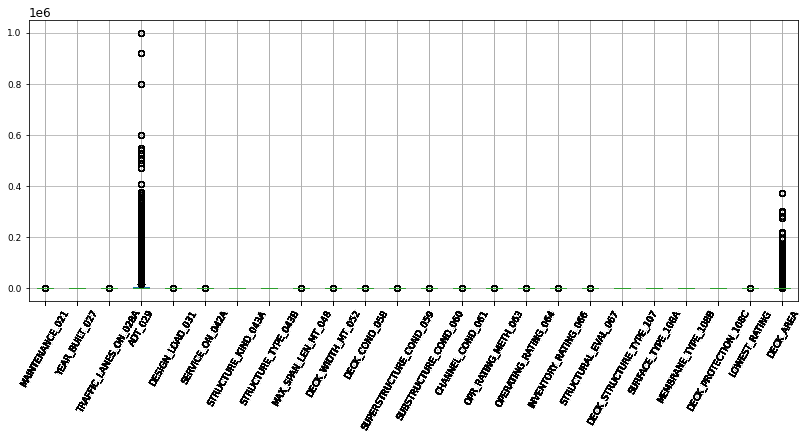

In [ ]:
plt.figure(figsize=(80,30))
n=list(bridges99)

i=0
for col in list(bridges99):  
  i=1+1
  plt.subplot(5,5,i)
  boxplot=bridges99.boxplot(column=n, fontsize=9,rot=60)
  #plt.title(col)

**Winsorize TO REMOVE MOST OUTLIERS**

In [ ]:
from scipy.stats.mstats import winsorize
for col in n:  
 bridges99[col] = winsorize(bridges99[col], [.05,.05])

**BOXPLOTS AFTER WINSORIZING**

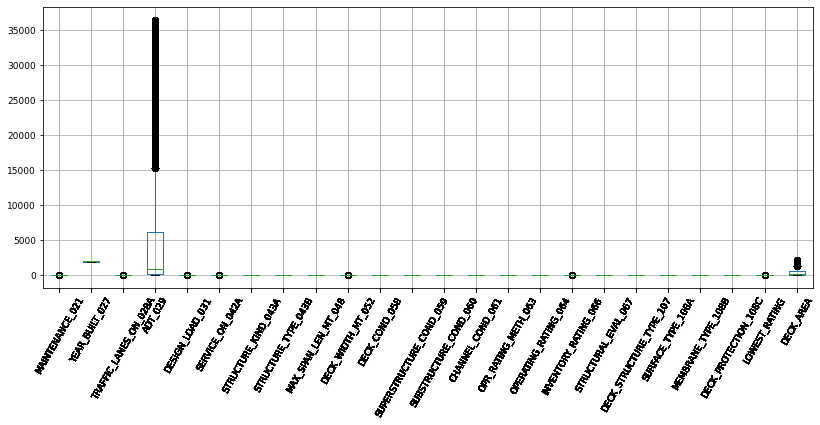

In [ ]:
plt.figure(figsize=(80,30))
n=list(bridges99)

i=0
for col in n:  
  i=1+1
  plt.subplot(5,5,i)
  boxplot=bridges99.boxplot(column=n, fontsize=9,rot=60)
  #plt.title(col)

STILL HAVE ABOUT 550K ROWS -- NEED TO **SIGNIFICANTLY** REDUCE SIZE BECAUSE OF LIMITED HARDWARE RESOURCES

In [ ]:
bridges99=bridges99.sample(frac = 0.20,replace=False)

In [ ]:
bridges99.shape

(120384, 24)

**HEATMAP -- BIVARIATE ANALYSIS**

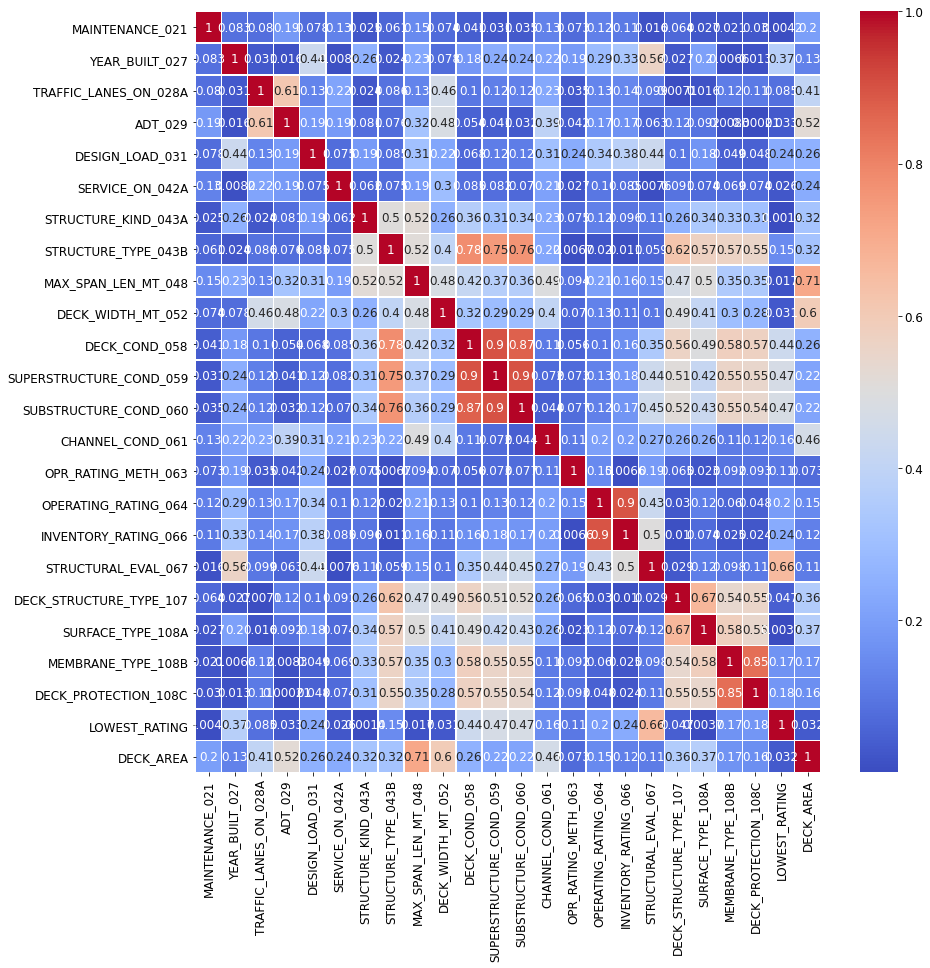

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(bridges99.corr().abs(),annot=True,linewidth=0.5,   cmap='coolwarm')

**DROPPING ALL 4 OF THE 'CONDITIONS' USED FOR SCORING**

**AND OTHERS HIGHLY CORRELATED**

In [ ]:
bridges99.drop(['SUPERSTRUCTURE_COND_059'],axis=1,inplace=True)
bridges99.drop(['OPERATING_RATING_064'],axis=1,inplace=True)
bridges99.drop(['DECK_COND_058'],axis=1,inplace=True)
bridges99.drop(['STRUCTURE_TYPE_043B'],axis=1,inplace=True)
bridges99.drop(['DECK_PROTECTION_108C'],axis=1,inplace=True)
bridges99.drop(['STRUCTURAL_EVAL_067'],axis=1,inplace=True)
bridges99.drop(['SUBSTRUCTURE_COND_060'],axis=1,inplace=True)
bridges99.drop(['CHANNEL_COND_061'],axis=1, inplace=True)
bridges99.drop(['TRAFFIC_LANES_ON_028A'] ,axis=1,inplace=True)
bridges99.drop(['MAX_SPAN_LEN_MT_048'],axis=1,inplace=True)

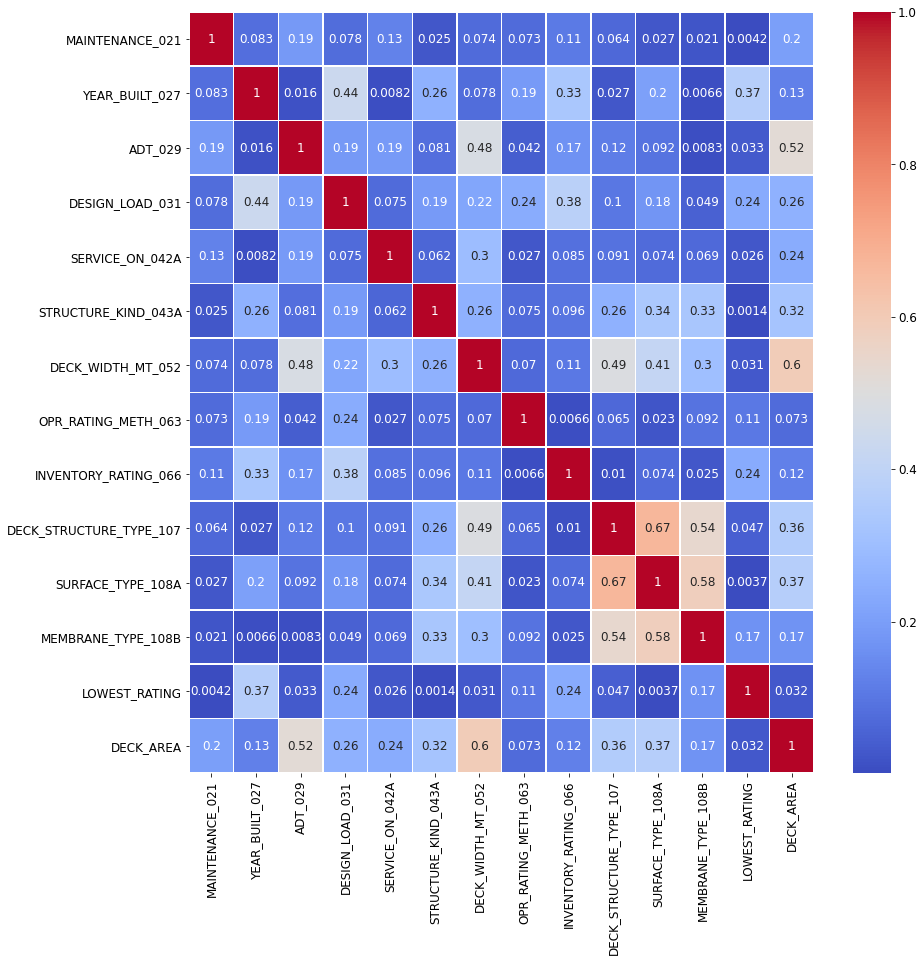

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(bridges99.corr().abs(),annot=True,linewidth=0.5,   cmap='coolwarm')

In [ ]:
bridges99.shape

(120384, 14)

**TARGET**

In [ ]:
y=bridges99['LOWEST_RATING']

**DROP TARGET**

In [ ]:
X2=bridges99
X=X2
X.drop(['LOWEST_RATING'],axis=1,inplace=True)

**TRAIN_TEST_SPLIT**

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.20, random_state = 42)


**SMOTE**

In [ ]:
smt = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

## **RANDOM FOREST**

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=16, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

rfc.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=16, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

**ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ**

**SMOTE**

In [ ]:
y_train_pred = rfc.predict(X_train_SMOTE)
y_pred = rfc.predict(X_test)
print('Train recall: {:.5f}'.format(recall_score(y_train_SMOTE, y_train_pred)))
print('Test recall: {:.5f}'.format(recall_score(y_test, y_pred)))
display(pd.DataFrame(confusion_matrix(y_train_SMOTE, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

Train recall: 0.89192
Test recall: 0.57088


0      1
0  66263   6164
1   7828  64599

0     1
0  15936  2159
1   2567  3415

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     18095
           1       0.61      0.57      0.59      5982

    accuracy                           0.80     24077
   macro avg       0.74      0.73      0.73     24077
weighted avg       0.80      0.80      0.80     24077

ROC-AUC: 0.72578


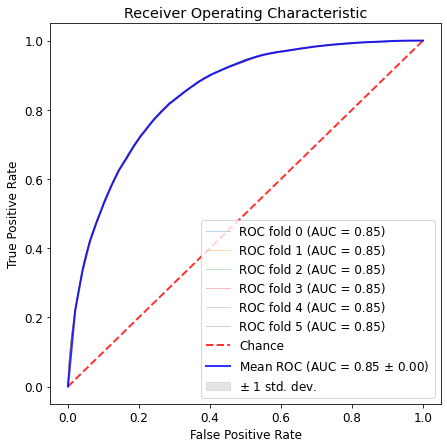

In [ ]:
 #Classification and ROC analysis
 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier =rfc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 50)

fig, ax = plt.subplots(figsize=(7,7))

for i, (train, test) in enumerate(cv.split(X, y)):
    #classifier.fit(X_train, y_train)
    classifier.fit(X_train_SMOTE, y_train_SMOTE)
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver Operating Characteristic")
ax.legend(loc="lower right")

plt.show()

In [ ]:
# print best parameter after tuning 
classifier.feature_importances_ 
  
# print how our model looks after hyper-parameter tuning 
#print(classifier.best_estimator_) 

array([0.03009334, 0.2092697 , 0.03002445, 0.14276804, 0.01831357,
       0.11148968, 0.05414236, 0.04840086, 0.09520461, 0.06244009,
       0.07709975, 0.08643693, 0.03431662])

In [ ]:
important_features_dict = {}
for x,i in enumerate(classifier.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [1, 3, 5, 8, 11, 10, 9, 6, 7, 12, 0, 2, 4]


**ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ**

**CONFUSION MATRIX**

Text(0.5, 194.08, 'Predicted label')

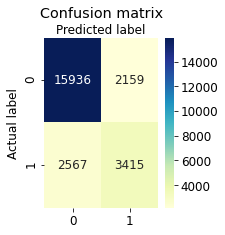

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
#plt.figure(figsize=(19,19))


class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3,3))
plt.rcParams.update({'font.size': 12})
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap='CMRmap_r',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
classifier.score(X_train,y_train)

0.8579542504698516

In [ ]:
classifier.score(X_test,y_test)

0.8045437554512606

In [ ]:
train_probs = classifier.predict_proba(X_train)
test_probs = classifier.predict_proba(X_test)

In [ ]:
log_loss(y_train, train_probs)

0.331930658004554

In [ ]:
log_loss(y_test, test_probs)

0.4117411822057753

//////////////////////////////////////////////////////////////////////////////////////////////////////////


In [ ]:
importances = classifier.feature_importances_
indices = np.argsort(importances)

In [ ]:
features=X_test.columns

In [ ]:
features[indices]

Index(['SERVICE_ON_042A', 'ADT_029', 'MAINTENANCE_021', 'DECK_AREA',
       'OPR_RATING_METH_063', 'DECK_WIDTH_MT_052', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'INVENTORY_RATING_066',
       'STRUCTURE_KIND_043A', 'DESIGN_LOAD_031', 'YEAR_BUILT_027'],
      dtype='object')

**PLOT OF FEATURE IMPORTANCE**

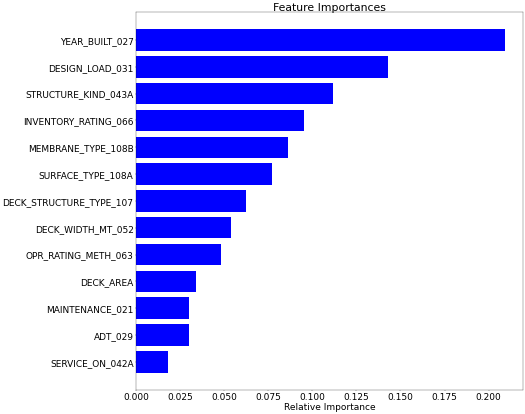

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})
figure(num=None, figsize=(20,20), dpi=25, facecolor='w', edgecolor='k')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

//////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
! pip install eli5 --quiet

     |████████████████████████████████| 112kB 6.6MB/s 


### **PERMUTATION IMPORTANCE**

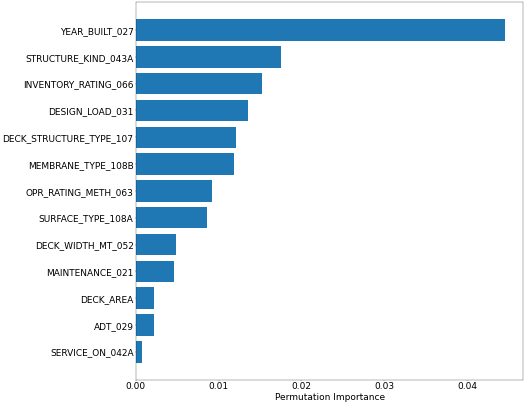

In [ ]:
import eli5
from sklearn.inspection import permutation_importance
# the permutation based importance
plt.figure(figsize=(20,20),dpi=25)
plt.rcParams.update({'font.size': 26})
perm_importance = permutation_importance(classifier, X_test, y_test)
eli5.show_weights(perm_importance)


sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

# **SHAPLEY VALUES**

**SHAPLEY VALUES COME FROM GAME THEORY AND ARE A METHOD TO EQUITABLE DISTRIBUTE OF GAINS (OR LOSSES) THAT RESULT FROM A GROUP EFFORT.**


"The Shapley values [104] provide an answer on how to fairly share a payout among the players of a collaborative game. The collaborative game idea can be applied to ML where features (i.e., the players) collaborate to make a prediction (i.e., the payout)..."

arXiv:2010.09337v1 [stat.ML] 19 Oct 2020

"Shapley value based model interpretation methods have gained a lot of popularity recently, since they have solid theoretical foundation and has been demonstrated to produce interpretations that matches human intuitions (Strumbelj and Kononenko, 2014; ˇ Lundberg and Lee, 2017). Also, since Shapley value of a variable takes into account the variables’ individual as well as combined contribution for predicting a target of interest..."

arXiv:2008.05052v1 [cs.LG] 12 Aug 2020

In [ ]:
! pip install shap --quiet

     |████████████████████████████████| 327kB 6.3MB/s 


In [ ]:
import shap;shap.initjs()

In [ ]:
feature_names = [i for i in X_test.columns]

In [ ]:
df=pd.DataFrame(X_test)

=================================================================

In [ ]:
row_to_show = 0
#data_for_prediction = df.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
row=data_for_prediction.name
print('row =  ',row)
lowest=bridges2020.iloc[row]['LOWEST_RATING']
print('lowest_rating =  ',lowest)
data_for_prediction_array = data_for_prediction.values.reshape(1,-1)

#print(data_for_prediction)
classifier.predict_proba(data_for_prediction_array) #*****************************************
pred0=classifier.predict_proba(data_for_prediction_array)[0][0]
pred1=rfc.predict_proba(data_for_prediction_array)[0][1]

row =   543014
lowest_rating =   6


In [ ]:
start_time = timer(None)

data_for_prediction=df.iloc[0]
row=data_for_prediction.name
lowest=bridges2020.iloc[row]['LOWEST_RATING']
d={'row':row,'low':lowest,'pred0':pred0,'pred1':pred1}
df2 = pd.DataFrame(data=d,index=['row'])
#data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired

#d={'row': 452091, 'low': 7, '   e0': 0.5002113068989222, '    e1': 0.49978869310107765, 'pred0': 0.48563553363732687, 'pred1': 0.5143644663626731}

#df2=df2.append(d,ignore_index=True)

for i in range(1,df.shape[0]):
#for i in range(1,10):

  data_for_prediction=df.iloc[i]
  
 
  row=data_for_prediction.name
 
  data_for_prediction_array=data_for_prediction.values.reshape(1, -1)
  pred0=classifier.predict_proba(data_for_prediction_array)[0][0]
  #pred1=rfc.predict_proba(data_for_prediction_array)[0][1]
  pred1=1-pred0
  lowest=bridges2020.iloc[row]['LOWEST_RATING']
  #print(' lowest=  ',lowest)

  #explainer = shap.TreeExplainer(classifier)
  #expected_value=explainer.expected_value
  
  #e0=expected_value[0]
  #e1=expected_value[1]
  

  d={'row':row,'low':lowest,'pred0':pred0,'pred1':pred1}


 #shap_values = explainer.shap_values(data_for_prediction)
  #df_new = pd.DataFrame(data=d,index=['row'])
  df2=df2.append(d,ignore_index=True)
  df2['row']=df2['row'].astype(int)

timer(start_time)


 Time taken: 0 hours 42 minutes and 44.01 seconds.


In [ ]:
df2.shape

(24077, 4)

In [ ]:
df.shape

(24077, 13)

In [ ]:
df2.head()

row  low  pred0  pred1  new_score
1  579220 7.00   0.70   0.30       7.39
2   45233 6.00   0.63   0.37       6.27
3   20959 7.00   0.92   0.08       7.83
4  612148 6.00   0.47   0.53       5.94
5  466178 7.00   0.34   0.66       6.68

In [ ]:
df2['new_score']=[x+abs(y-z) if ((x>5) & (y<.5))|((x<6) & (y>.5)) else x-abs(y-z) for x,y,z in zip(df2['low'],df2['pred1'],df2['pred0']) ] 


In [ ]:
df2[df2['new_score']<6].count()

row          7553
low          7553
pred0        7553
pred1        7553
new_score    7553
dtype: int64

In [ ]:
df2['new_score'].mean()

6.686649190634034

In [ ]:
df2['new_score'].median()

6.815989673700193

In [ ]:
df2.describe()

row      low    pred0    pred1  new_score
count  24077.00 24077.00 24077.00 24077.00   24077.00
mean  308568.16     6.24     0.70     0.30       6.69
std   179204.33     1.19     0.25     0.25       1.47
min       92.00     0.00     0.03     0.00      -0.27
25%   152672.00     6.00     0.52     0.07       5.60
50%   308448.00     6.00     0.76     0.24       6.82
75%   465222.00     7.00     0.93     0.48       7.84
max   617046.00     9.00     1.00     0.97      10.00

**DISTRIBUTION IN TESTING DATA**

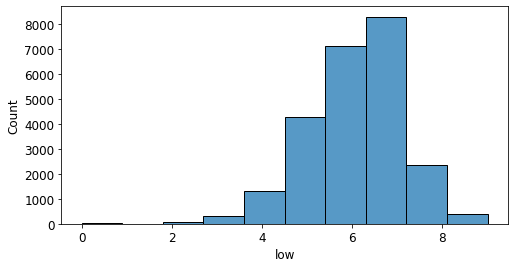

In [ ]:
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
sns.histplot(data=df2,x='low',bins=10);

**NORMAL CURVE OVERLAY**

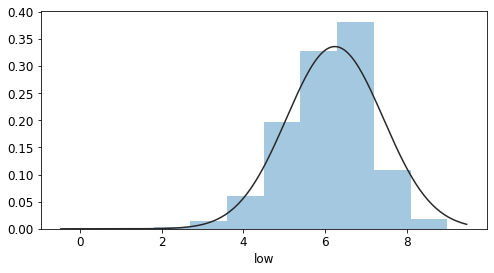

In [ ]:
from scipy.stats import norm
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
sns.distplot(df2['low'],fit=norm,kde=False,bins=10);

**DISTRIBUTION OF ADJUSTED SCORES WITH NORMAL CURVE OVERLAY**

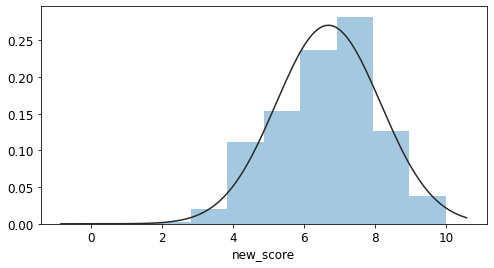

In [ ]:
from scipy.stats import norm
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
sns.distplot(df2['new_score'],fit=norm,kde=False,bins=10);

**HISTOGRAM OF ADJUSTED SCORES**

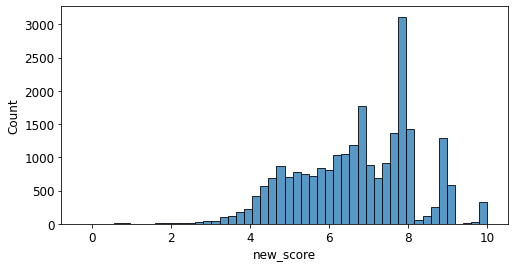

In [ ]:
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
sns.histplot(data=df2,x='new_score',bins=50);

**ADJUSTED SCORES WITH NORMAL CURVE AND DENSITY OVERLAYS**

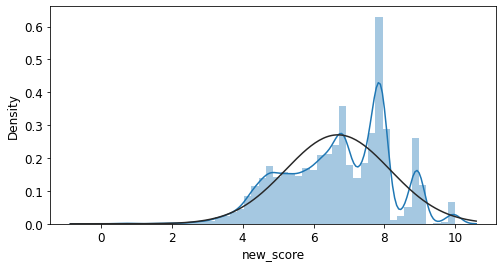

In [ ]:
from scipy.stats import norm
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
sns.distplot(df2['new_score'], fit=norm, kde=True);

**YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY**

## **DISAGGREGATION -- local importance**

**Shapley values allow us to breakout the features for each bridge**

**It explains why you differ from the base score**

**You can see how each feature contributed to the final score**

**THESE ARE SHAPLEY FORCE PLOTS**

**YOU CAN SEE HOW EACH FEATURE CONTRIBUTER TO THE FINAL VALUE BY PUSHING THE SCORE UP OR DOWN**

Reading the graphs is straight-forward:

**Red means increasing**

**Blue mean decreasing**


FOR EXAMPLE --WE CAN SEE THAT --> ***YEAR_BUILT*** <--HAD A LARGE POSITIVE IMPACT (BECAUSE IT IS RED)

WHEREAS --> ***MEMBRANE_TYPE*** <-- HAS A POSITIVE IMPACT (BECAUSE IT IS BLUE)

**LOWEST_RATING FOR ROW 0 IS 6**




**Class 1**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1] ,shap_values[1],df.iloc[0,:])


**Class 0**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],df.iloc[0,:])

In [ ]:
df2.iloc[0]

row         543014.00
low              6.00
pred0            0.98
pred1            0.02
new_score        6.95
Name: 0, dtype: float64

In [ ]:
row_to_show = 2365

#data_for_prediction = df.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
row=data_for_prediction.name
print('row =  ',row)
lowest=bridges2020.iloc[row]['LOWEST_RATING']
print('lowest_rating =  ',lowest)
data_for_prediction_array = data_for_prediction.values.reshape(1,-1)

#print(data_for_prediction)
classifier.predict_proba(data_for_prediction_array) #*****************************************


row =   49293
lowest_rating =   4


array([[0.59934084, 0.40065916]])

In [ ]:
import shap
explainer = shap.TreeExplainer(classifier)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)
shap_values

[array([ 0.05686598, -0.03932011,  0.00152689, -0.03073901,  0.0125057 ,
         0.08467115,  0.00451058, -0.02004855, -0.00935605,  0.01803967,
         0.02260309, -0.01306025,  0.01090551]),
 array([-0.05686598,  0.03932011, -0.00152689,  0.03073901, -0.0125057 ,
        -0.08467115, -0.00451058,  0.02004855,  0.00935605, -0.01803967,
        -0.02260309,  0.01306025, -0.01090551])]

LOWEST RATING WAS 4

THIS ONE WAS MISCLASSIFIED -- AS PART OF CLASS 1 VALUE SHOULD  BE ABOVE THE BASE VALUE

**CLASS 1**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1],df.iloc[24076,:])

**CLASS 0**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],df.iloc[24076,:])

**THE NEXT TWO GRAPHS SHOW THE EXACT COURSE TAKEN TO ARRIVE AT THE SCORES FOR THE ABOVE TWO PLOTS (.6, .4)**.

**READ FROM THE BOTTOM UP**

**BOTH GRAPHS START ON THE X-AXIS AT THE 'BASE VALUE'**

**YOU CAN SEE, AS WITH THE GRAPHS ABOVE, THE EXACT CONTRIBUTION (POSITIVE OR NEGATIVE) OF EACH FEATURE**


**Class 1**

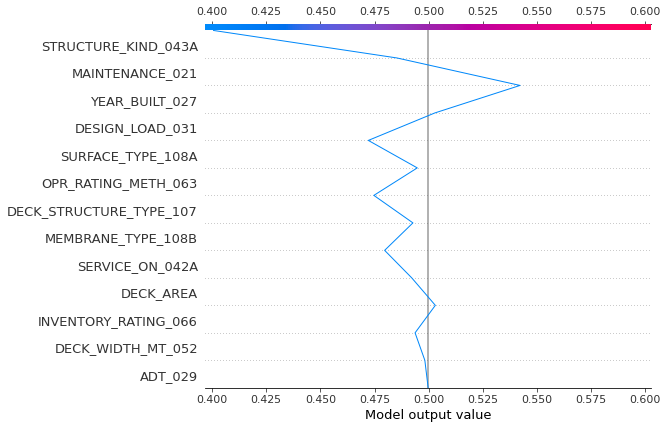

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], feature_names)


**Class 0**

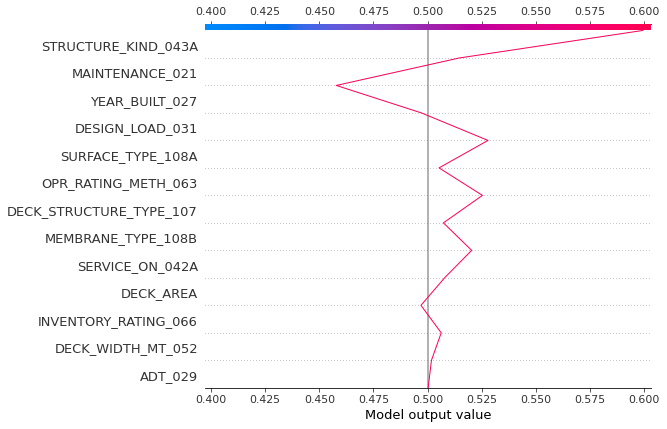

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names)

**THE NEXT GRAPH SHOWS GLOBAL FEATURE IMPORTANCE**


 Time taken: 1 hours 22 minutes and 3.55 seconds.


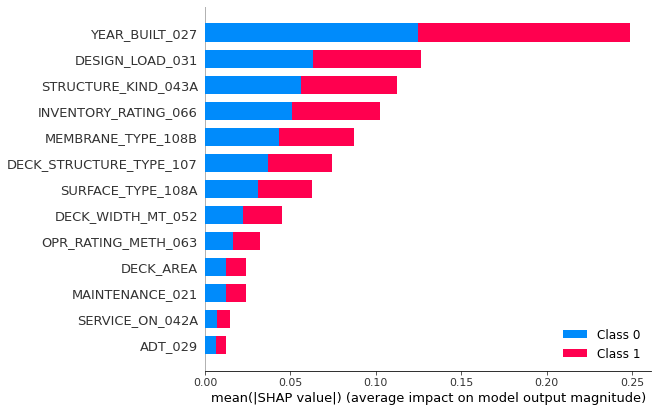

In [ ]:
start_time = timer(None)
shap_values = shap.TreeExplainer(classifier).shap_values(X_test)
timer(start_time)
shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=feature_names)

**THE NEXT TWO GRAPHS ALSO SHOW GLOBAL FEATURE IMPORTANCE BROKEN DOWN BY CLASS**

**Class 1**

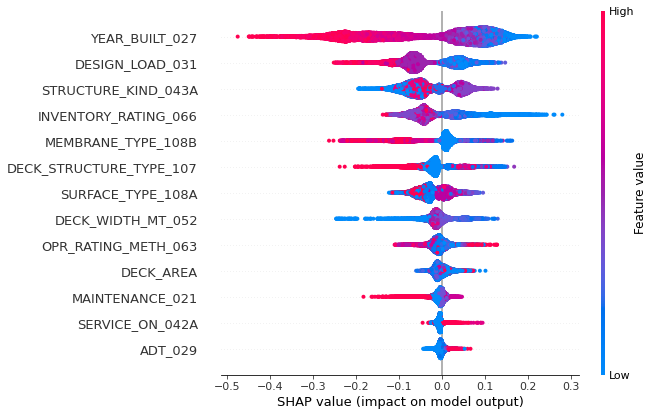

In [ ]:
shap.summary_plot(shap_values[1],X_test,feature_names=feature_names)

**Class 0**

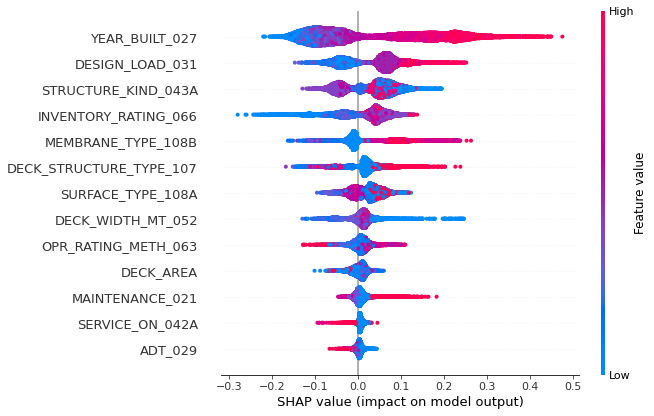

In [ ]:
shap.summary_plot(shap_values[0],X_test,feature_names=feature_names)

In [ ]:
feature_names

['MAINTENANCE_021',
 'YEAR_BUILT_027',
 'ADT_029',
 'DESIGN_LOAD_031',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'DECK_WIDTH_MT_052',
 'OPR_RATING_METH_063',
 'INVENTORY_RATING_066',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_AREA']

**THE NEXT FEW GRAPHS SHOWS INTERACTION EFFECTS**

### **SHAP DEPENDENCE PLOTS**

**NOTE THAT ON AL THE BELOW GARPHS, THE "VERTICAL SPREAD" (AMPLITUDE) OF EACH BAR (OR SLICE OF POINTS) IS THE RESULT OF INTERACTION EFFECTS**

**THESE GRAPHS ARE FUNCTIONALY EQUIVALENT TO PARTIAL DEPENDENCE PLOTS**



FOR THIS FIRST GRAPH I CHOSE THE FEATURES

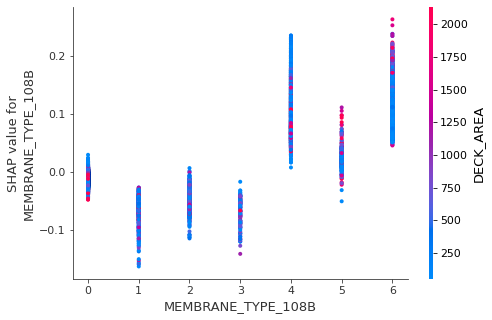

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(classifier)

# calculate shap values. This is what we will plot shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('MEMBRANE_TYPE_108B', shap_values[0],X_test, interaction_index="DECK_AREA")#

**IN THE NEXT SEVERAL GRAPHS, I CHOSE THE X-AXIS FEATURE -- THE SYSTEM AUTOMATICALLY CHOSE THE Y-AXIS FEATURE

 **A FEATURE WITH HIGH INTERACTION BUT NOT NECESSARILY THE ONLY ONE THAT INTERACTS**

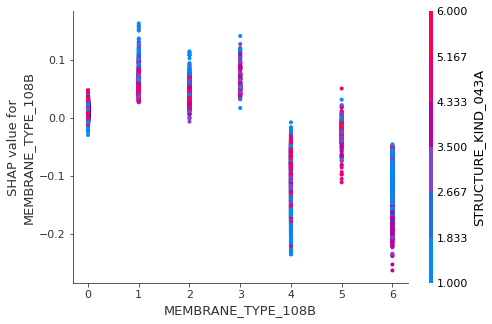

In [ ]:
shap.dependence_plot('MEMBRANE_TYPE_108B', shap_values[1],X_test, interaction_index="STRUCTURE_KIND_043A")

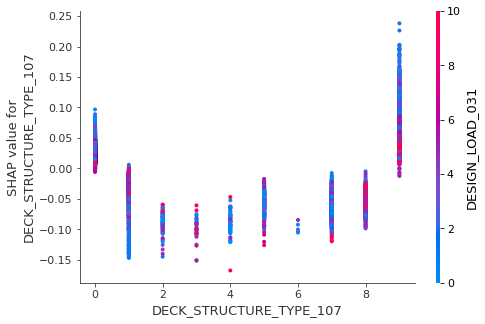

In [ ]:
shap.dependence_plot(9,shap_values[0], X_test)

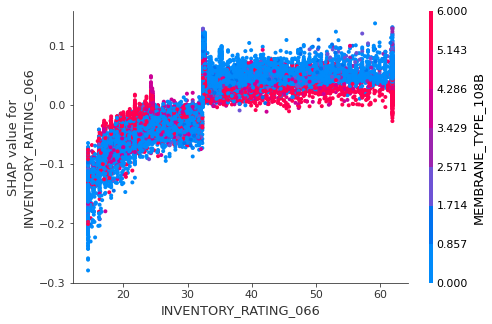

In [ ]:
shap.dependence_plot(8,shap_values[0], X_test)

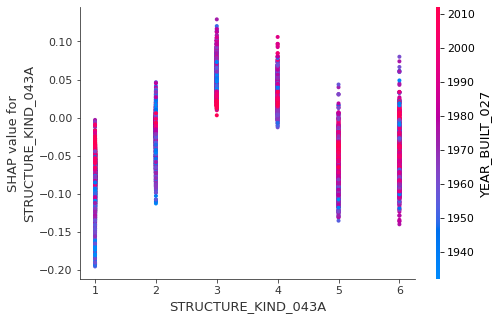

In [ ]:
shap.dependence_plot(5,shap_values[1], X_test,feature_names=feature_names)

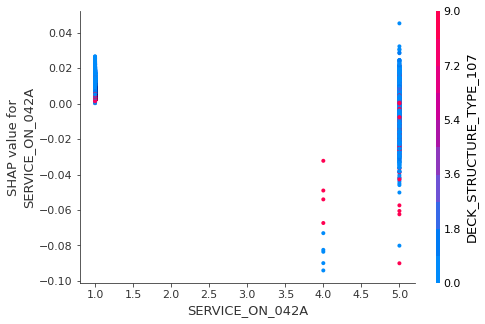

In [ ]:
shap.dependence_plot(4,shap_values[0], X_test,feature_names)

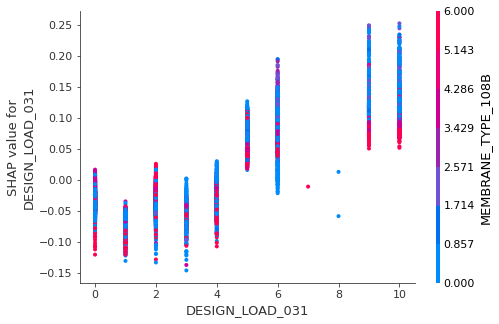

In [ ]:
shap.dependence_plot(3,shap_values[0], X_test)

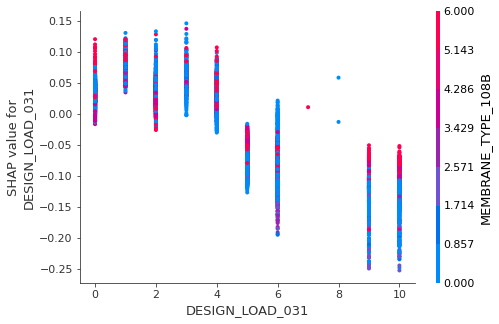

In [ ]:
shap.dependence_plot(3,shap_values[1], X_test)

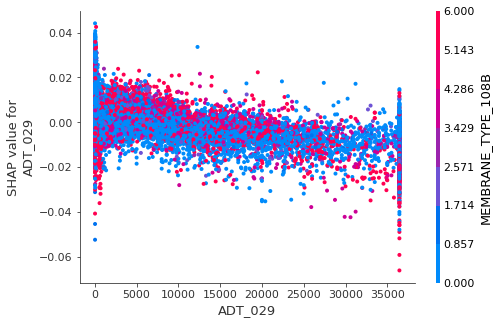

In [ ]:
shap.dependence_plot(2,shap_values[0], X_test)

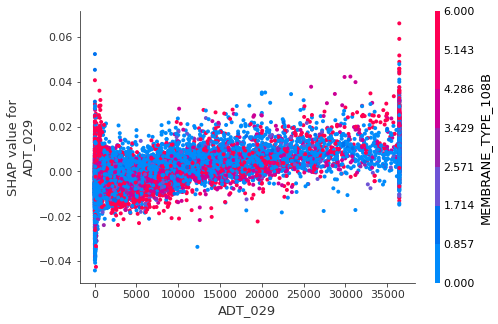

In [ ]:
shap.dependence_plot(2,shap_values[1], X_test)

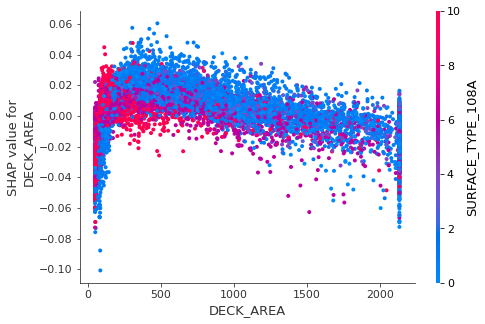

In [ ]:
shap.dependence_plot(12,shap_values[0], X_test)

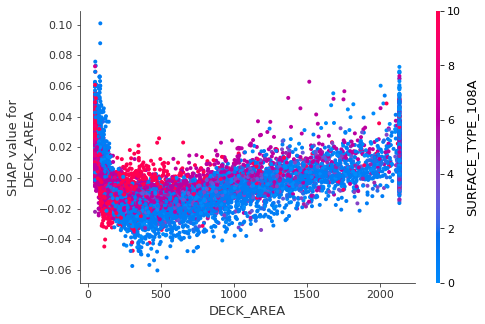

In [ ]:
shap.dependence_plot(12,shap_values[1], X_test)

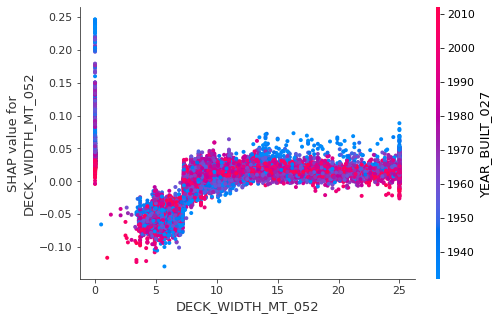

In [ ]:
shap.dependence_plot(6,shap_values[0], X_test)

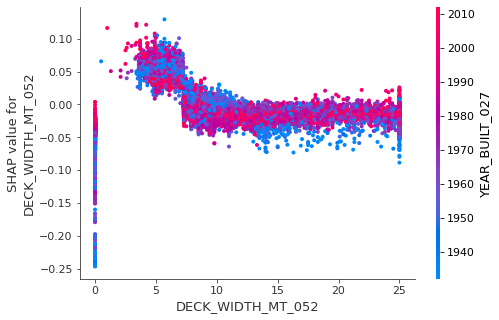

In [ ]:
shap.dependence_plot(6,shap_values[1], X_test,feature_names)

**////////////////////////////////////////////////////////////////////////////**

# **XGBoost**

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
xgb.fit(X_train_SMOTE,y_train_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

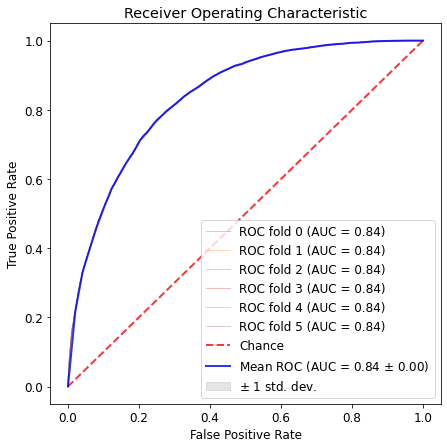

In [ ]:
 #Classification and ROC analysis
 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier =xgb

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 50)

fig, ax = plt.subplots(figsize=(7,7))

for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver Operating Characteristic")
ax.legend(loc="lower right")

plt.show()

**CLASSIFICATION REPORT**

In [ ]:
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print('Train recall: {:.5f}'.format(recall_score(y_train, y_train_pred)))
print('Test recall: {:.5f}'.format(recall_score(y_test, y_pred)))
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('ROC-AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

Train recall: 0.43706
Test recall: 0.41825


0      1
0  68061   4366
1  13443  10437

0     1
0  16871  1224
1   3480  2502

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     18095
           1       0.67      0.42      0.52      5982

    accuracy                           0.80     24077
   macro avg       0.75      0.68      0.70     24077
weighted avg       0.79      0.80      0.79     24077

ROC-AUC: 0.67531


**FEATURE IMPORTANCE -- WEIGHT**

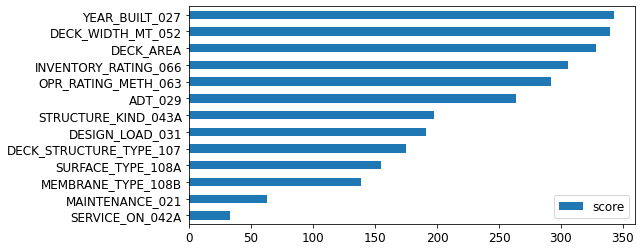

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh');

**FEATURE IMPORTANCE -- GAIN**

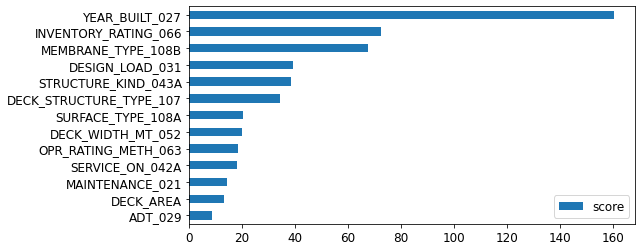

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh');

**FEATURE IMPORTANCE -- COVER**



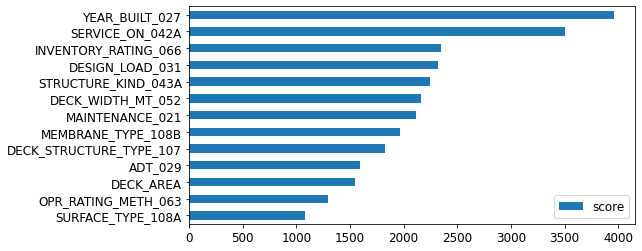

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh');

**FEATURE IMPORTANCE -- TOTAL GAIN**

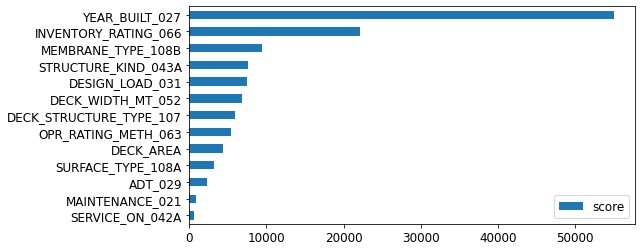

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='total_gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh');

**XGB FEATURE_IMPORTANCES**

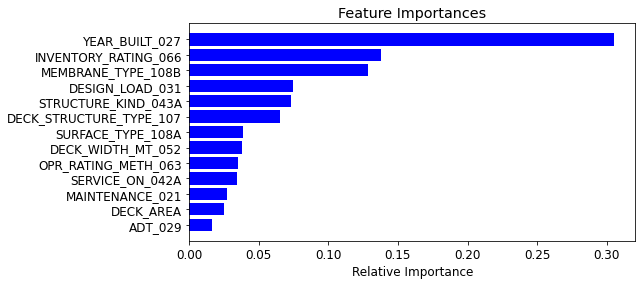

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 26})
#figure(num=None,#dpi=18, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams.update({'font.size': 12})
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

**SHAPLEY VALUES BASED ON XGBREGRESSOR**

In [ ]:
# this takes a few minutes since we are explaining thousands of samples
import shap
start_time = timer(None)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
timer(start_time)


 Time taken: 0 hours 0 minutes and 13.63 seconds.


In [ ]:
shap_values[100,:]

array([ 0.03142344,  0.25437567,  0.00860568,  0.08964597, -0.02795102,
       -0.34474346, -0.606852  ,  0.1381637 , -0.2927911 , -0.25224924,
       -0.03741654, -0.43428546, -0.0099309 ], dtype=float32)

In [ ]:
import shap
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[100,:], X_test.iloc[100,:],link='logit')

In [ ]:
import shap
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:],link='logit')

In [ ]:
row_to_show=2365
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction
row=data_for_prediction.name
bridges2020.iloc[row]['LOWEST_RATING']
print('row =  ',row)
lowest=bridges2020.iloc[row]['LOWEST_RATING']
print('lowest_rating =  ',lowest)

row =   49293
lowest_rating =   4


In [ ]:
import shap
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[row_to_show,:], data_for_prediction,link='logit')

In [ ]:
row_to_show=0
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction
row=data_for_prediction.name
bridges2020.iloc[row]['LOWEST_RATING']
print('row =  ',row)
lowest=bridges2020.iloc[row]['LOWEST_RATING']
print('lowest_rating =  ',lowest)

row =   543014
lowest_rating =   6


In [ ]:
import shap
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[row_to_show,:], data_for_prediction,link='logit')

In [ ]:
row_to_show=2366
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction
row=data_for_prediction.name
bridges2020.iloc[row]['LOWEST_RATING']
print('row =  ',row)
lowest=bridges2020.iloc[row]['LOWEST_RATING']
print('lowest_rating =  ',lowest)

row =   597083
lowest_rating =   5


In [ ]:
import shap
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[row_to_show,:], data_for_prediction,link='logit')

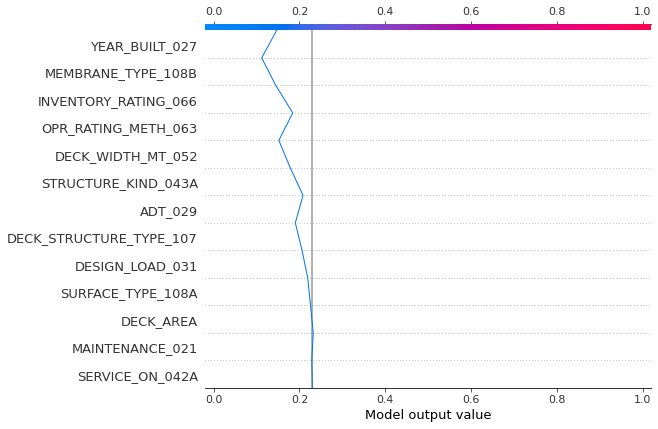

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[2366,:], feature_names,link="logit")

**SHAPLEY DEPENDENCE PLOTS -- XGBREGRESSOR**

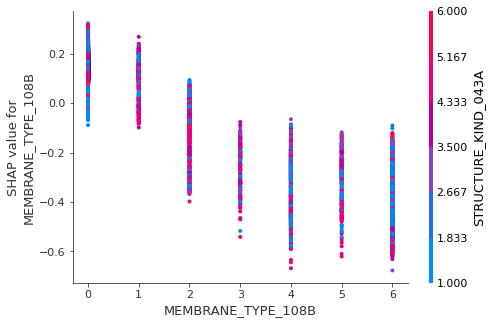

In [ ]:
shap.dependence_plot('MEMBRANE_TYPE_108B', shap_values,X_test, interaction_index="STRUCTURE_KIND_043A")

**SHAPLEY GLOBAL IMPORTANCE**

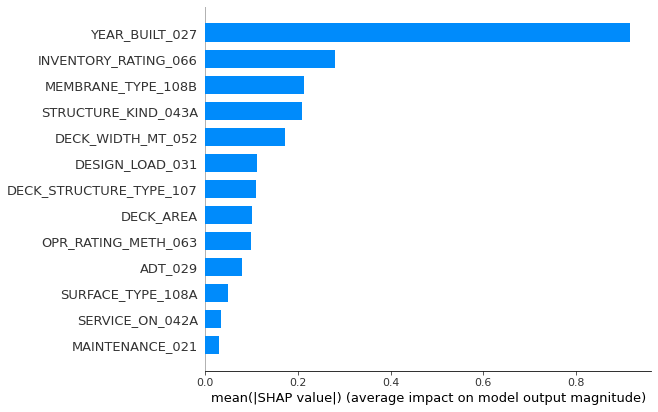

In [ ]:
shap.summary_plot(shap_values, X_test,plot_type='bar')

In [ ]:
important_features_dict = {}
for x,i in enumerate(xgb.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [1, 8, 11, 3, 5, 9, 10, 6, 7, 4, 0, 12, 2]


In [ ]:
importances = classifier.feature_importances_
indices = np.argsort(importances)

In [ ]:
importances = xgb.feature_importances_

In [ ]:
importances

array([0.02692679, 0.30533376, 0.01677131, 0.07433318, 0.03452579,
       0.07351156, 0.03806702, 0.03509286, 0.13773212, 0.0650771 ,
       0.0388499 , 0.12863404, 0.02514464], dtype=float32)

In [ ]:
indices = np.argsort(importances)

In [ ]:
features=X_test.columns

In [ ]:
features[indices]

Index(['ADT_029', 'DECK_AREA', 'MAINTENANCE_021', 'SERVICE_ON_042A',
       'OPR_RATING_METH_063', 'DECK_WIDTH_MT_052', 'SURFACE_TYPE_108A',
       'DECK_STRUCTURE_TYPE_107', 'STRUCTURE_KIND_043A', 'DESIGN_LOAD_031',
       'MEMBRANE_TYPE_108B', 'INVENTORY_RATING_066', 'YEAR_BUILT_027'],
      dtype='object')

**STANDARD XGB FEATURE_IMPORTANCES PLOT**

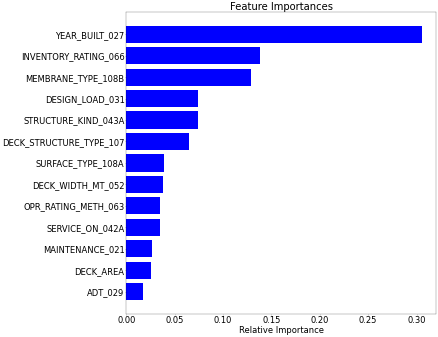

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
figure(num=None, figsize=(20,20), dpi=20, facecolor='w', edgecolor='k')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

**PERMUTATION IMPORTANCES**

Text(0.5, 0, 'Permutation Importance')

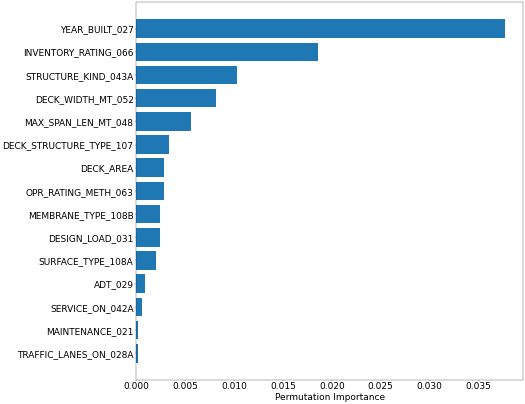

In [ ]:
import eli5
from sklearn.inspection import permutation_importance
# the permutation based importance
plt.figure(figsize=(20,20),dpi=25)
plt.rcParams.update({'font.size': 26})
perm_importance = permutation_importance(xgb, X_test, y_test)
eli5.show_weights(perm_importance)


sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

**SHAPLEY FORCE PLOT FOR FIRST 100 VALUES -- INTERACTIVE -- MOUSE OVER**

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_test.iloc[:100,:])

**SHAPLEY DEPENDENCE PLOTS**

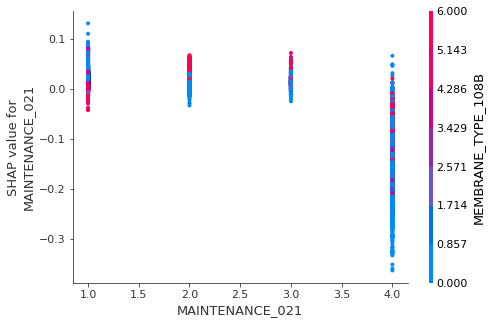

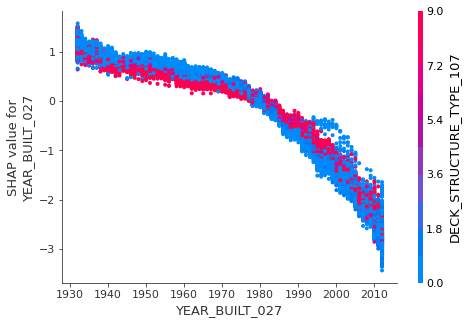

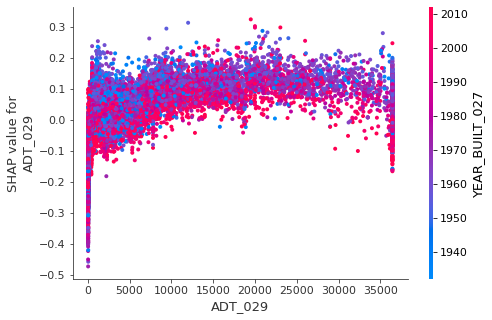

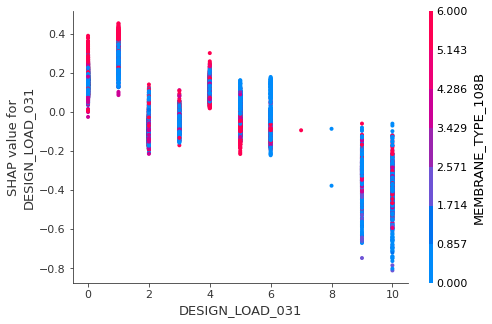

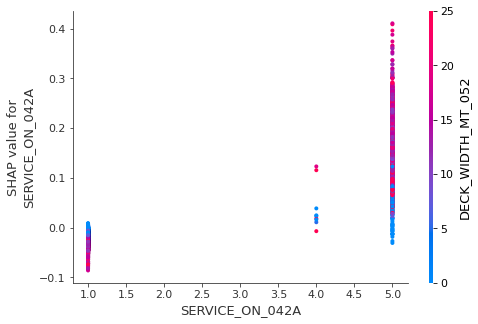

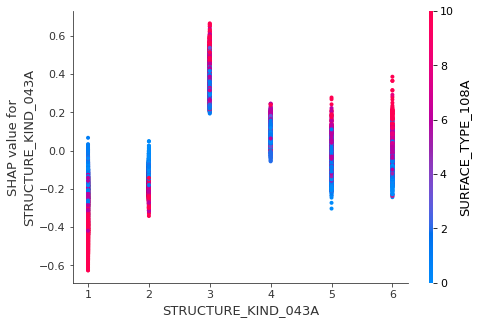

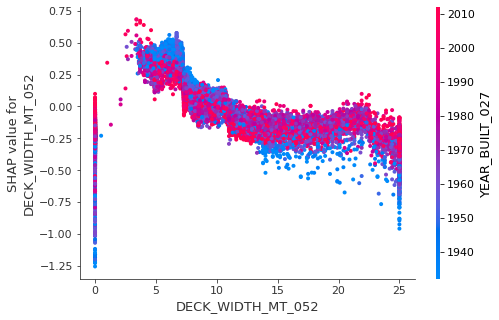

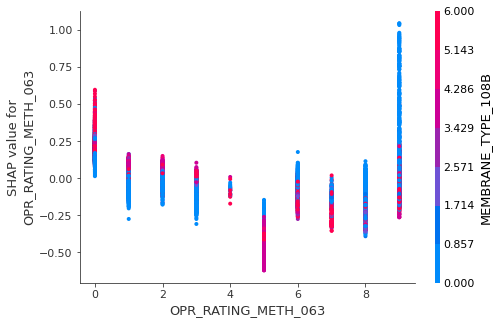

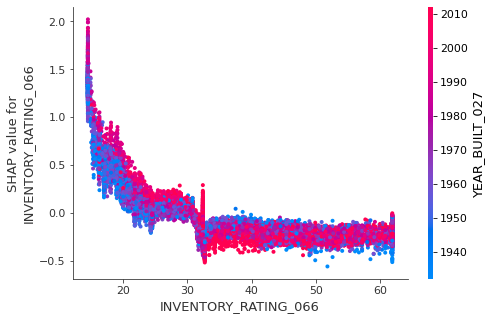

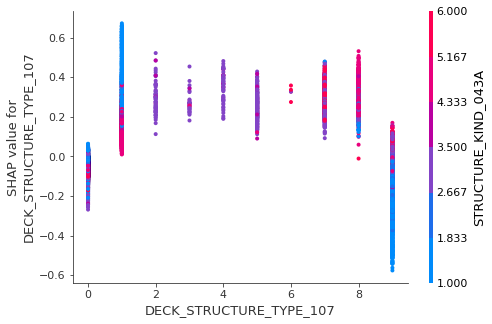

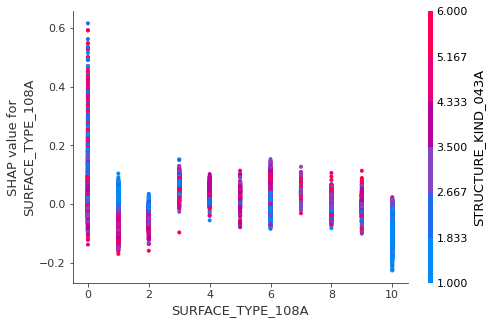

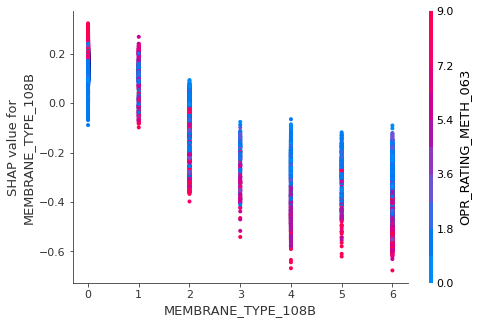

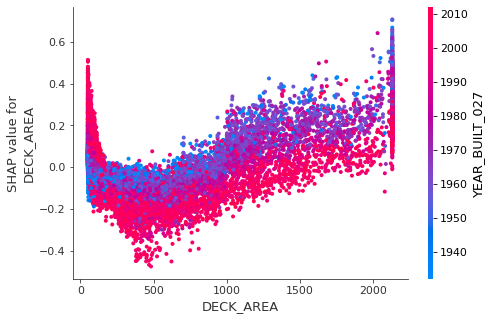

In [ ]:
for i in X_test.columns:
  shap.dependence_plot(i,shap_values, X_test)
  print('')

# **DISCUSSION**

What you have just seen is just one possible way to accomplish what I set out to do: 

1 – Refine the rating scale

2 – Disaggregation – produce an explanation on a per-bridge basis.

It’s rather rough for mostly one reason: Lack of hardware computing power.
With the massive database and historical data available much more can be done. 

As to my rerating – it’s a matter of trial and error. The people who developed BERT used trial and error in deciding what percentage of the output should be masked -- so I follow the big footsteps.
